<a href="https://colab.research.google.com/github/hirujaroshani/ML-project/blob/main/Group_15_Predicting_Customer_Churn_in_the_Telecom_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group 15_Predicting Customer Churn in the Telecom Industry**

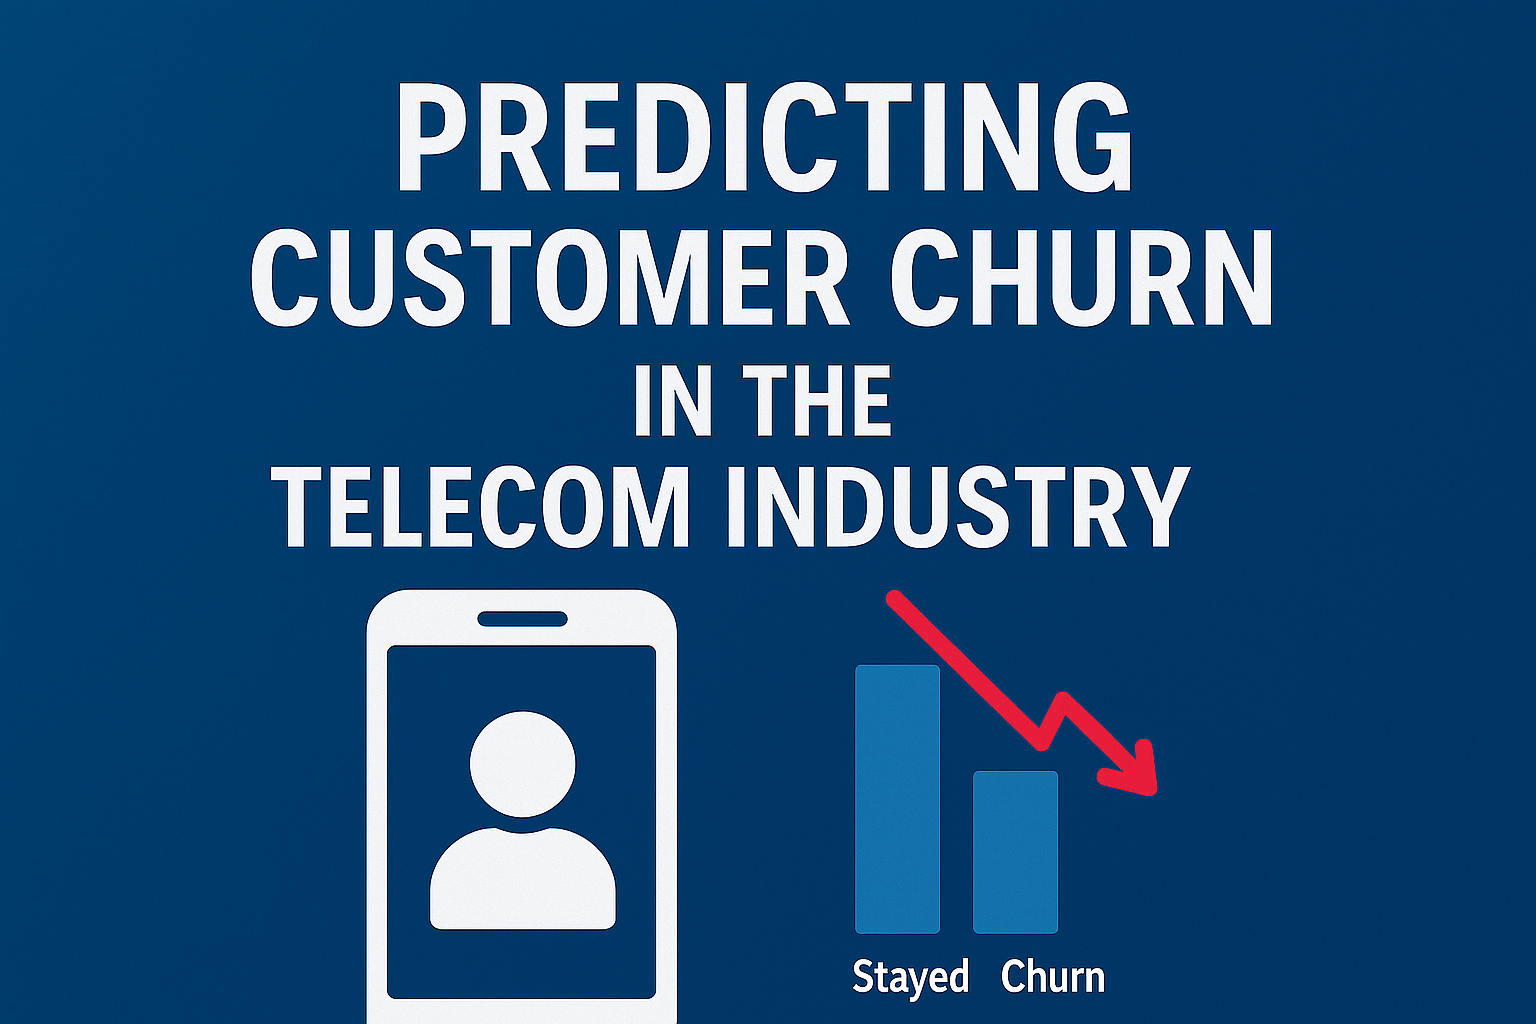

## Group Members
$$
\begin{array}{cc}
\textbf{K.W.H. Roshani} & \textbf{C. Agakar} \\
\text{EG/2020/4167} & \text{EG/2020/3805}
\end{array}
$$


## Introduction

Customer churn refers to the phenomenon where customers discontinue their relationship with a service provider. In the context of the telecommunication industry, churn typically occurs when customers cancel their subscriptions or switch to a competitor's services. This poses a significant challenge for telecom companies, as retaining existing customers is often more cost effective than acquiring new ones.

Predicting customer churn enables telecom providers to proactively identify at risk customers and implement targeted retention strategies. By leveraging machine learning techniques, companies can analyze patterns in customer behavior, usage, and demographics to make accurate churn predictions.

This project aims to develop a machine learning based model to predict customer churn using the publicly available **Telco Customer Churn** dataset. The study will explore two classification models, **Decision Tree** and **Random Forest** to assess their effectiveness in identifying customers who are likely to churn. The ultimate goal is to gain actionable insights that can assist telecom companies in reducing customer attrition and enhancing service quality.


---
##Literature Survey
Customer churn, often defined as the rate at which customers discontinue their service with a company, poses a serious financial threat to telecom providers. With annual churn rates sometimes exceeding 30% in this industry, retaining customers has become more critical than ever [1]. The cost of acquiring a new customer is estimated to be five to seven times higher than retaining an existing one [2]. This financial burden has motivated researchers and telecom operators to explore machine learning (ML) as a means of predicting churn before it happens, enabling timely, targeted retention strategies.

Early efforts in churn prediction focused on classical machine learning methods such as logistic regression, decision trees, and support vector machines (SVM). Logistic regression is often used as a baseline model due to its simplicity and interpretability. However, its linear nature makes it less capable of capturing complex, non linear relationships between customer features and churn behavior. For example, Taskin [2] found that logistic regression yielded relatively poor recall when applied to telecom churn data, failing to detect many actual churners.

Decision trees, in contrast, can model non linear feature interactions through hierarchical splits. They are favored for their transparency and ease of interpretation, particularly in business settings. However, they can be prone to overfitting and are sensitive to small changes in the data [3]. SVMs have also been explored, given their ability to handle non linear classification boundaries using kernel tricks. Still, they often underperform in churn scenarios due to imbalanced class distributions and high feature dimensionality [3].

To overcome the limitations of single models, researchers have increasingly adopted ensemble methods. Random Forest, which aggregates the results of multiple decision trees trained on different data subsets, has shown excellent performance in numerous studies. Chang et al. [1] reported a Random Forest model achieving 91.66% accuracy with balanced precision and recall, making it suitable for both identifying churners and reducing false positives. Similarly, Wagh et al. [4] found Random Forest to outperform other classifiers, achieving over 99% accuracy when applied to an upsampled dataset. Its robustness to overfitting and ability to handle mixed feature types make Random Forest a popular choice for real-world telecom applications.

Another leading approach is gradient boosting, specifically XGBoost and LightGBM. These models build sequential decision trees, each correcting the errors of the previous one. Taskin [2] showed that both XGBoost and LightGBM outperformed other models, achieving 95.74% accuracy, while also offering better recall for the churn class. Gradient boosting methods typically surpass bagging methods like Random Forest when tuned properly, although they can be more complex to train and interpret.

Many studies have also included comparative evaluations. Gaur and Dubey [3] compared logistic regression, SVM, Random Forest, and gradient boosting, concluding that boosting yielded the highest accuracy (AUC ~84.6%). Kavitha et al. [5] also showed that ensemble models like Random Forest and XGBoost outperformed simpler models in accuracy and reliability. Notably, ensemble methods consistently offered stronger recall for identifying actual churners, crucial for effective retention planning.

Recent research has emphasized not just predictive performance but also interpretability. Explainable AI techniques such as SHAP and LIME have been applied to ensemble models to reveal how specific features influence predictions. Chang et al. [1] demonstrated how SHAP values could identify key churn indicators like tenure, contract type, and service charges, enabling data driven business interventions. This interpretability is particularly important in customer facing industries like telecom, where understanding why a prediction was made is often as valuable as the prediction itself.

Another important trend is handling class imbalance. Churn datasets often contain far more non churners than churners. Methods like SMOTE (Synthetic Minority Over sampling Technique) and cost sensitive learning have been used to address this imbalance. Wagh et al. [4] highlighted how oversampling significantly boosted the performance of their decision tree models, raising accuracy from ~78% to over 93% before even applying ensemble methods.

In summary, the literature demonstrates a clear shift toward ensemble and hybrid approaches for telecom churn prediction. While traditional models like logistic regression and decision trees offer interpretability, they lack the predictive power of modern ensemble methods. Random Forest and XGBoost, in particular, stand out as highperforming models capable of capturing complex churn patterns. Combined with explainability tools and proper class balancing techniques, these models enable telecom providers to not only predict churn with high accuracy but also to understand and act upon the underlying reasons.

---
## Dataset Description


The dataset used in this study is the Telco Customer Churn dataset, consisting of 7,043 customer records and 21 attributes. These attributes capture demographic details, subscription types, service usage, account information, and billing charges.


🔗 **Dataset Link:** [Click here to view the dataset on Kaggle](https://www.kaggle.com/datasets/palashfendarkar/wa-fnusec-telcocustomerchurn/data)

---

## Key Features

- `customerID` – Unique customer identifier  
- `gender` – Gender of the customer (Male/Female)  
- `SeniorCitizen` – Whether the customer is a senior citizen (1/0)  
- `Partner` – Whether the customer has a partner  
- `Dependents` – Whether the customer has dependents  
- `tenure` – Number of months the customer has stayed  
- `PhoneService` – Whether the customer has phone service  
- `MultipleLines` – If multiple phone lines are active  
- `InternetService` – DSL, Fiber optic, or None  
- `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport` – Value added services  
- `StreamingTV`, `StreamingMovies` – Entertainment services  
- `Contract` – Type of contract (Month to month, One year, Two year)  
- `PaperlessBilling` – Whether billing is paperless  
- `PaymentMethod` – Payment method used  
- `MonthlyCharges` – The monthly amount charged  
- `TotalCharges` – The total amount charged  
- `Churn` – **Target**: Whether the customer churned (Yes/No)  

---

## Algorithms Used

To build the churn prediction model, we apply two primary machine learning algorithms:

- **Decision Tree Classifier**  
- **Random Forest Classifier**  




In [ ]:
# Install required libraries, import dependencies, and set configurations
!pip -q install imbalanced-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay,
    PrecisionRecallDisplay, precision_recall_fscore_support, make_scorer, f1_score,
    accuracy_score, average_precision_score
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

import joblib, warnings
warnings.filterwarnings("ignore")
sns.set_theme(context="notebook", style="whitegrid")
np.random.seed(42)

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load data
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Project Data Set/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
# Drop unique identifier (because it is not useful for prediction)
df.drop(columns=["customerID"], inplace=True)

In [ ]:
# Show first five rows
display(df.head())

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [ ]:
# Dataset shape (rows, columns)
print("Shape of dataset:", df.shape)

# Data types of each column
print("\nData Types:\n", df.dtypes)

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

Shape of dataset: (7043, 20)

Data Types:
 gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing values per column:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
Pa

In [ ]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [ ]:
# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
#Impute missing values using tenure × MonthlyCharges
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df.apply(
    lambda r: r["tenure"] * r["MonthlyCharges"] if pd.isna(r["TotalCharges"]) else r["TotalCharges"], axis=1
)

In [ ]:
# printing the unique values in all the columns
numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]
for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [ ]:
# Replace "No internet service" / "No phone service" with "No"
for c in ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]:
    if c in df.columns:
        df[c] = df[c].replace({"No internet service": "No"})
if "MultipleLines" in df.columns:
    df["MultipleLines"] = df["MultipleLines"].replace({"No phone service":"No"})

In [ ]:
# Encode target variable (Churn → ChurnFlag: 0 = No, 1 = Yes)
df["ChurnFlag"] = df["Churn"].map({"No":0, "Yes":1}).astype(int)

In [ ]:
# Define numeric and categorical feature groups
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
cat_cols = [c for c in df.select_dtypes(include=["object","category"]).columns if c != "Churn"]

In [ ]:
# Display dataset shape, churn rate, and feature groups
print("Shape:", df.shape)
print("Churn rate:", df["ChurnFlag"].mean().round(3))
print("Numeric:", num_cols)
print("Categorical:", cat_cols)

Shape: (7043, 21)
Churn rate: 0.265
Numeric: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
# Class distribution of Churn
print("\nChurn distribution:\n", df['Churn'].value_counts())

# Percentage distribution
print("\nChurn percentage:\n", df['Churn'].value_counts(normalize=True) * 100)


Churn distribution:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn percentage:
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


# Dataset Description

The dataset used in this project is the Telco Customer Churn dataset from Kaggle. It contains 7,043 customer records with 21 variables describing demographic, account, service usage, and billing information, along with the churn label.

- Shape: (7043, 21) before preprocessing

- Target Variable:
  - Churn (Yes/No) → encoded into a binary column ChurnFlag (1 = Yes, 0 = No)
  - Encoding churn into numeric form is essential for supervised machine learning classification

---


## Data Quality Observations
- Dropped the customer ID column becucause it is not useful for prediction
- Before converting TotalCharges to numeric, the dataset showed no missing values
- After conversion, 11 missing values appeared (due to invalid entries such as blanks)
- These were imputed using the rule:  
  TotalCharges = tenure × MonthlyCharges  
  This ensures consistency and avoids losing data
- Service related features with categories like "No internet service" or "No phone service" were simplified to just "No" to reduce redundancy and improve model interpretability

---

## Class Distribution

- Churn = No → 5,174 customers (~73.5%)
- Churn = Yes → 1,869 customers (~26.5%)

This indicates that data set has a class imbalance problem.

##Exploratory Data Analysis

In [ ]:
X = df[num_cols + cat_cols]
y = df["ChurnFlag"].values

# Train-test split (85% train/val, 15% test) with stratification to maintain churn ratio
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)

In [ ]:
print("TrainVal:", X_trainval.shape, " Test:", X_test.shape)
print("TrainVal churn rate:", y_trainval.mean().round(3), " | Test churn rate:", y_test.mean().round(3))

# Training DataFrame for EDA ONLY (avoid data snooping)
trainval_df = pd.concat([X_trainval.reset_index(drop=True), pd.Series(y_trainval, name="ChurnFlag")], axis=1)
trainval_df["Churn"] = trainval_df["ChurnFlag"].map({0:"No",1:"Yes"})

TrainVal: (5986, 18)  Test: (1057, 18)
TrainVal churn rate: 0.265  | Test churn rate: 0.265


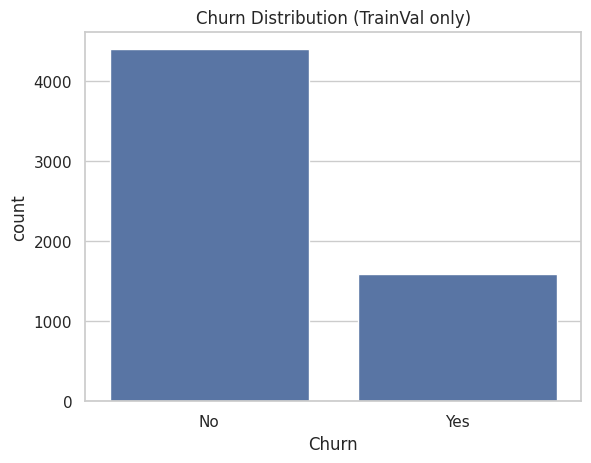

Churn
No     73.45
Yes    26.55
Name: percent (%), dtype: float64


In [ ]:
from scipy import stats

# Target distribution
sns.countplot(x="Churn", data=trainval_df)
plt.title("Churn Distribution (TrainVal only)"); plt.show()
print(trainval_df["Churn"].value_counts(normalize=True).mul(100).round(2).rename("percent (%)"))

The dataset is imbalanced, with 73.45% of customers retained and 26.55% churned, indicating the need for careful handling of class imbalance during modeling.

In [ ]:
#Converts SeniorCitizen (0/1) into a readable categorical (Yes/No) for plotting.
if "SeniorCitizen" in X_trainval.columns:
    trainval_df["SeniorCitizenCat"] = trainval_df["SeniorCitizen"].map({0:"No",1:"Yes"}).astype("category")

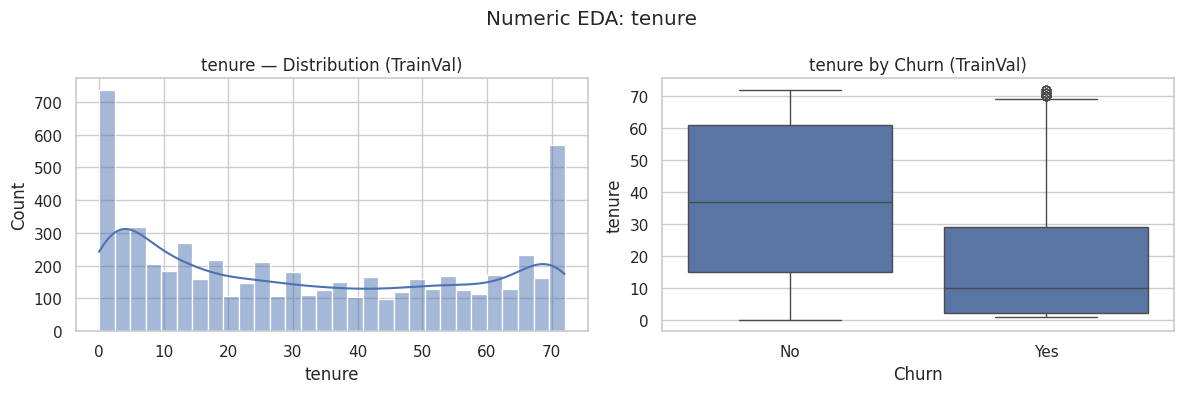

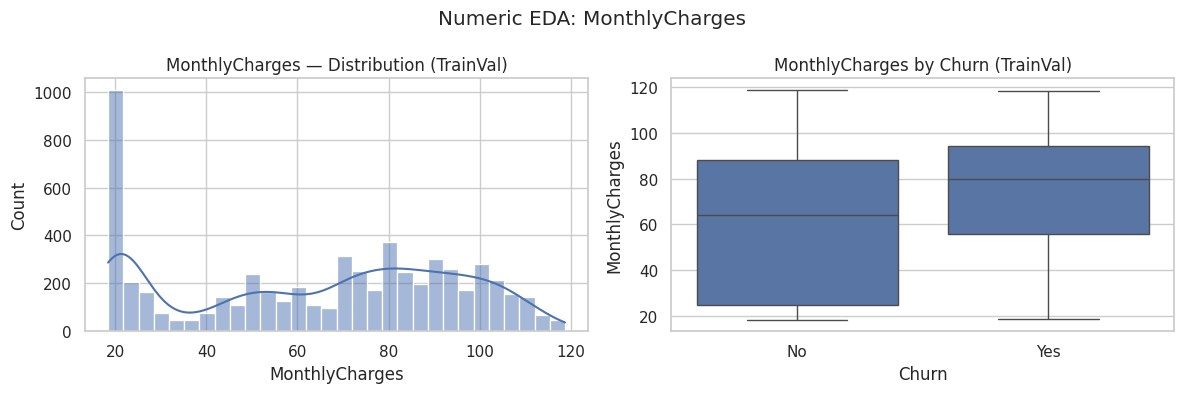

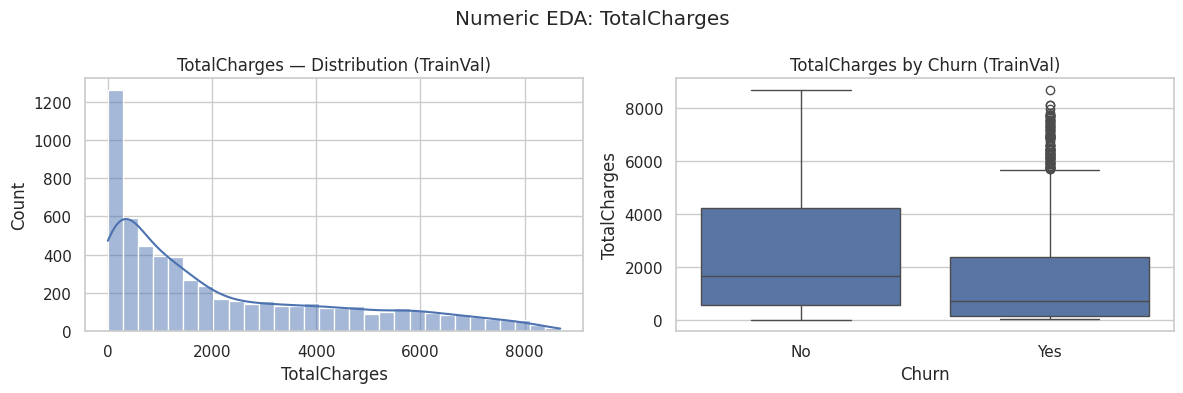

In [ ]:
# Numeric distributions & churn contrast
for col in num_cols:
    fig, axes = plt.subplots(1,2, figsize=(12,4))
    sns.histplot(trainval_df[col].dropna(), bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f"{col} — Distribution (TrainVal)")
    sns.boxplot(x="Churn", y=col, data=trainval_df, ax=axes[1])
    axes[1].set_title(f"{col} by Churn (TrainVal)")
    plt.suptitle(f"Numeric EDA: {col}"); plt.tight_layout(); plt.show()

- Tenure: Customers who have not been with the company for long are more likely to leave, while those who stay for many months or years are far less likely to churn. This shows that keeping customers engaged early is important to retaining them.

- Monthly charges: People who pay higher monthly bills are more likely to churn than those with lower charges. High service costs seem to push some customers away.

- Total charges: Customers who churn usually do not accumulate big bills, since they leave earlier. In contrast, long term customers naturally spend more over time.


Therefore, as a one insight it can be seen churners tend to have shorter tenures, higher monthly charges, and lower total charges compared to retained customers, indicating tenure and billing as key churn indicators. But further analysis should be done for affecting of total chargers for customer churning.

Also, there can be seen some outliers in this dataset. Those may represent real customer scenarios such as premium plan users or very new customers. Since they may carry important signals for churn, removing them could discard useful information. Therefore, not going to handle outliers separately here

In [ ]:
# Point biserial correlation
pb_rows = []
for col in num_cols:
    x = trainval_df[col].astype(float)
    yb = trainval_df["ChurnFlag"].astype(int)
    mask = x.notna()
    r, p = stats.pointbiserialr(yb[mask], x[mask])
    pb_rows.append((col, r, p))
pb_table = pd.DataFrame(pb_rows, columns=["feature","point_biserial_r","p_value"]).sort_values("point_biserial_r", ascending=False)
display(pb_table)

feature  point_biserial_r        p_value
1  MonthlyCharges          0.195814   8.241609e-53
2    TotalCharges         -0.193216   1.934260e-51
0          tenure         -0.346130  4.486041e-168

Tenure has the strongest negative correlation with churn, indicating customers with longer tenure are less likely to leave. Monthly charges show a positive correlation, indicating higher charges increase churn risk, while total charges are negatively correlated since churners leave earlier and do not accumulate high bills.

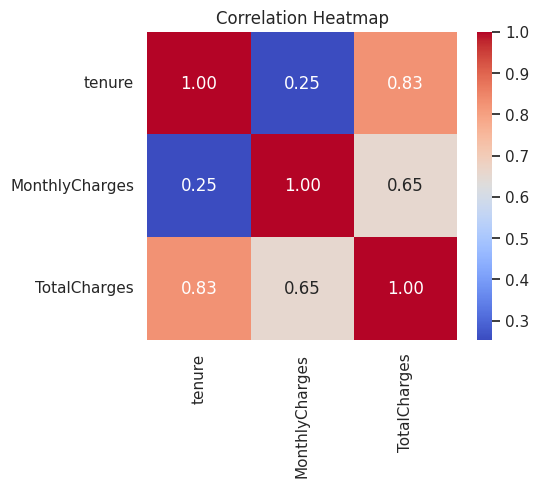

In [ ]:
# Correlation heatmap
plt.figure(figsize=(5,4))
sns.heatmap(trainval_df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap"); plt.show()

Correlation analysis shows that TotalCharges is highly correlated with tenure (r = 0.83) and moderately with MonthlyCharges (r = 0.65), suggesting redundancy as TotalCharges is essentially derived from tenure and monthly billing.

count  churn_rate
Contract                         
Month-to-month   3292       42.77
One year         1249       11.05
Two year         1445        2.98

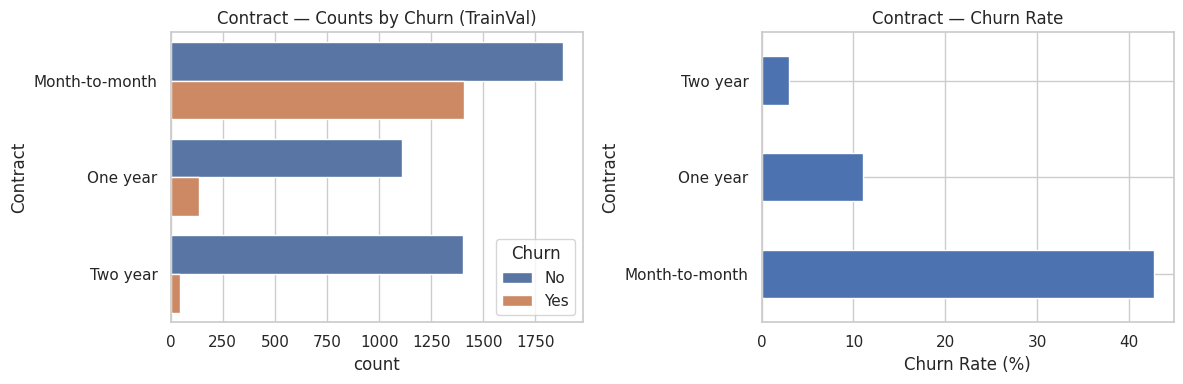

count  churn_rate
InternetService                   
Fiber optic       2616       42.01
DSL               2063       19.05
No                1307        7.42

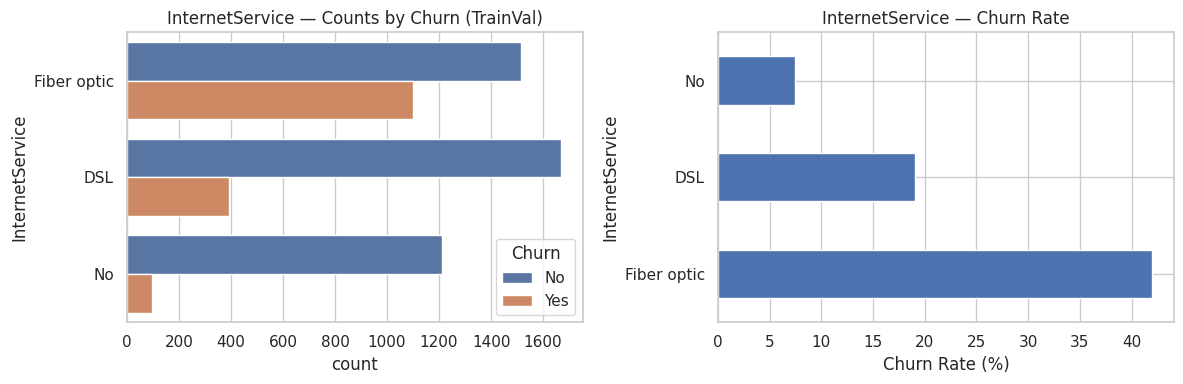

count  churn_rate
PaymentMethod                               
Electronic check            2002       45.90
Mailed check                1377       19.17
Bank transfer (automatic)   1307       16.30
Credit card (automatic)     1300       14.85

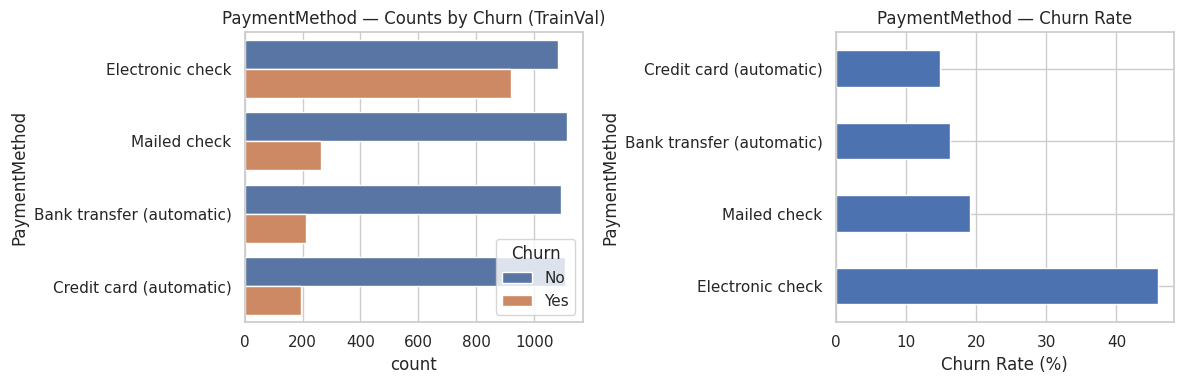

count  churn_rate
PaperlessBilling                   
Yes                3539       33.74
No                 2447       16.14

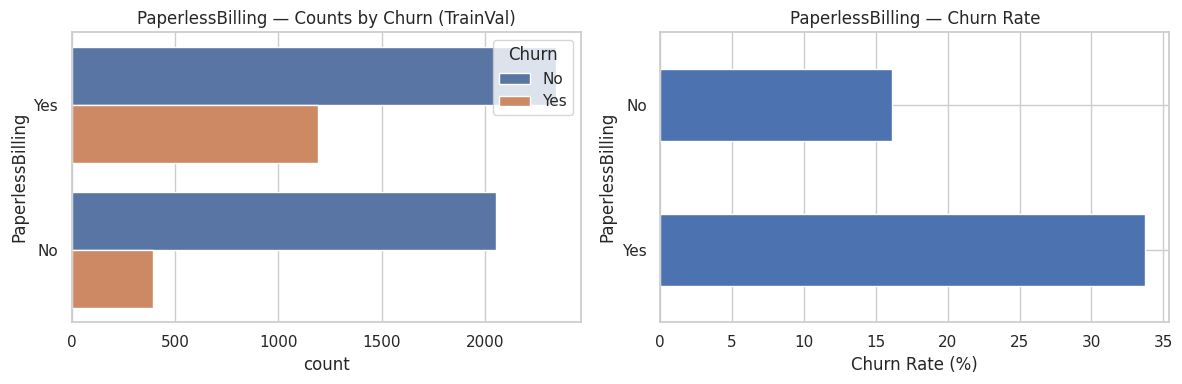

count  churn_rate
OnlineSecurity                   
No               4277       31.24
Yes              1709       14.80

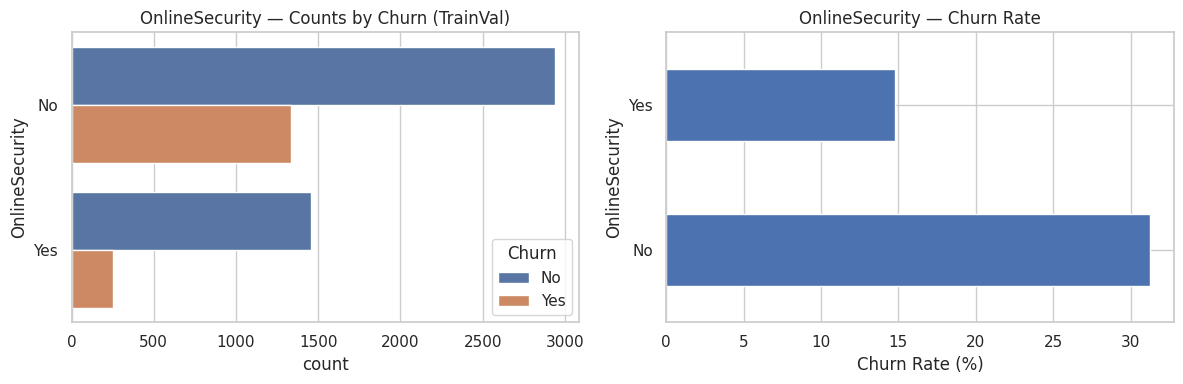

count  churn_rate
TechSupport                   
No            4238       31.22
Yes           1748       15.22

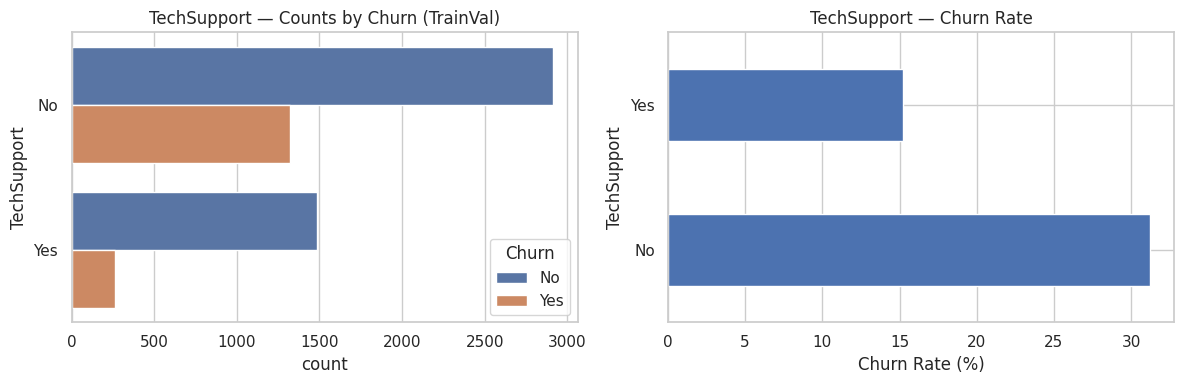

count  churn_rate
MultipleLines                   
Yes             2538       28.57
No              3448       25.06

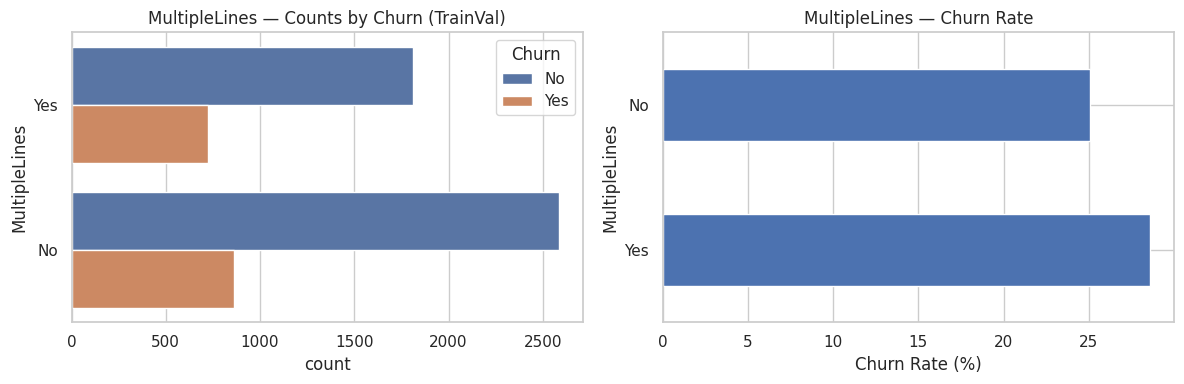

count  churn_rate
StreamingTV                   
Yes           2315       30.41
No            3671       24.11

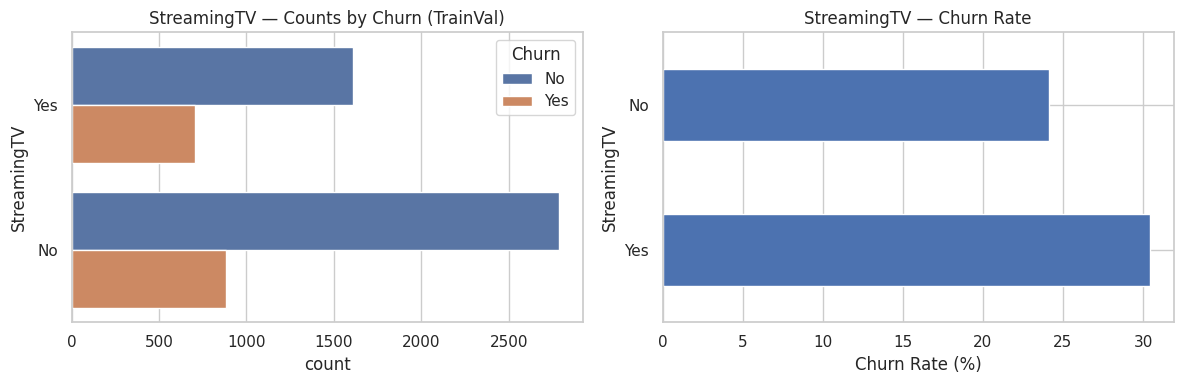

count  churn_rate
StreamingMovies                   
Yes               2329       30.01
No                3657       24.34

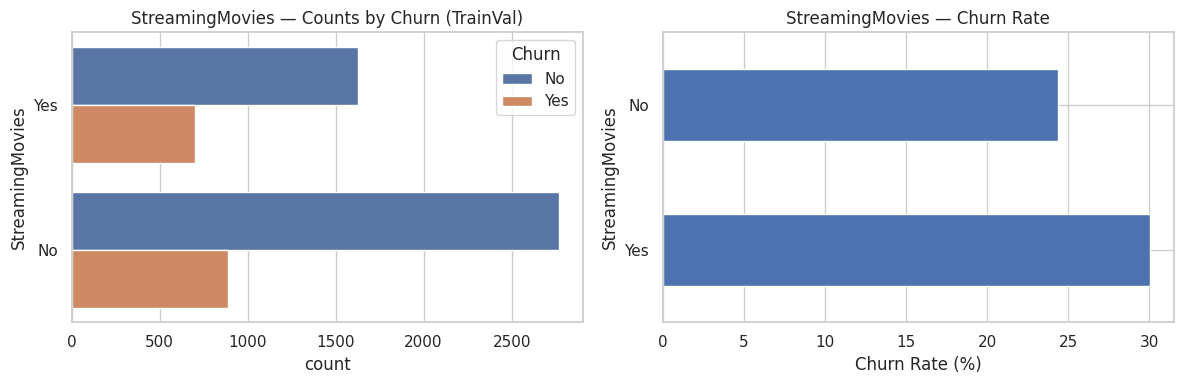

count  churn_rate
Partner                   
No        3085       32.90
Yes       2901       19.79

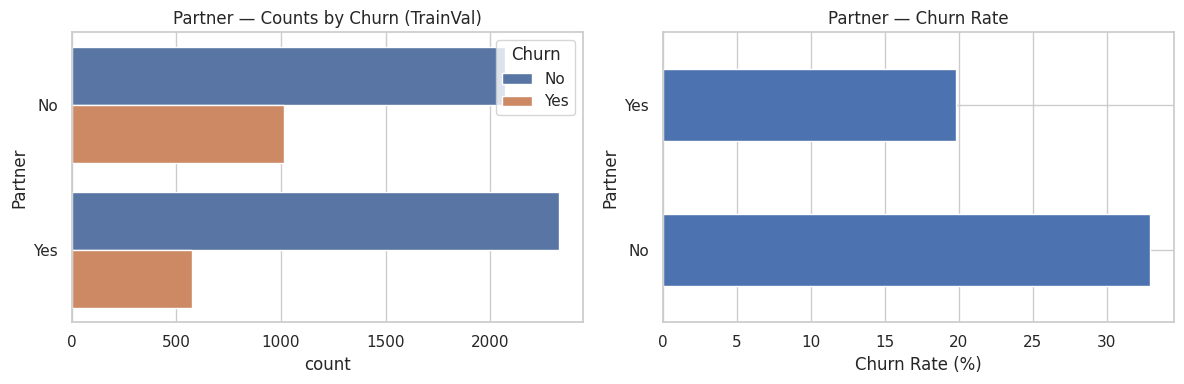

count  churn_rate
Dependents                   
No           4209       31.27
Yes          1777       15.36

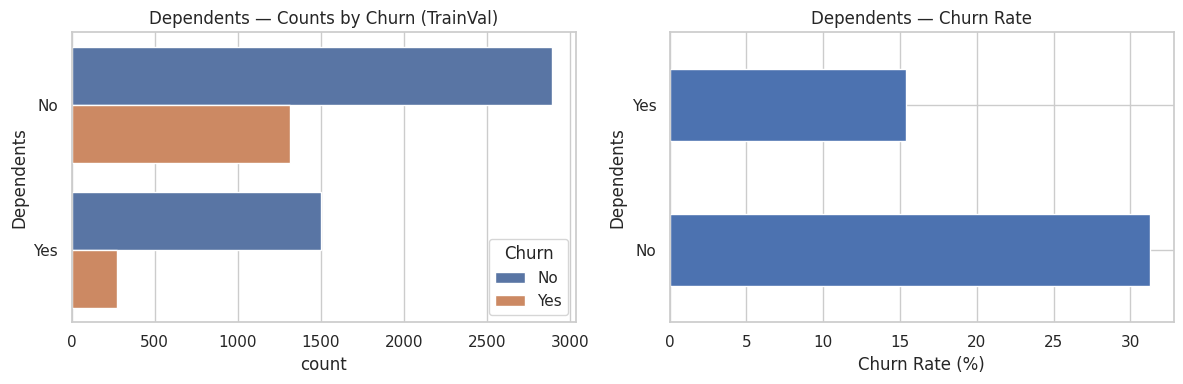

count  churn_rate
gender                   
Female   2959        26.9
Male     3027        26.2

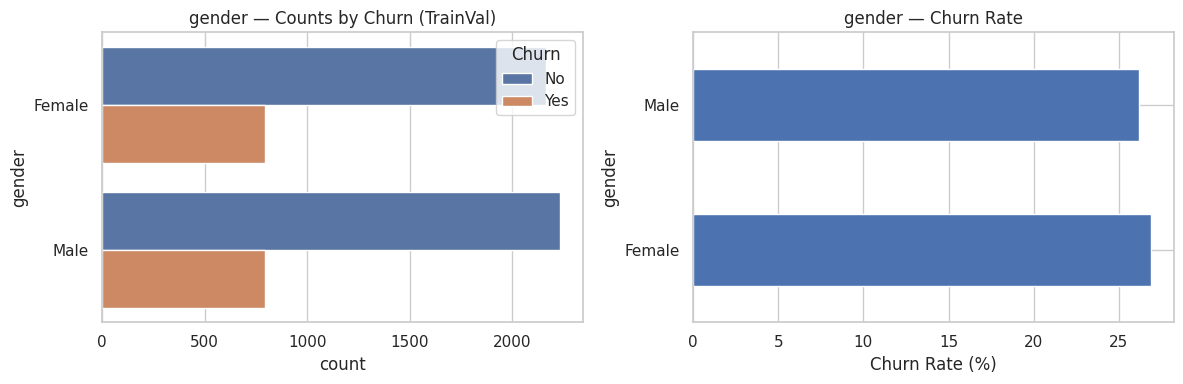

In [ ]:
# Categorical churn counts & rates
def plot_cat_churn(df_, col, topn=None):
    ct = (df_.groupby(col)["ChurnFlag"].agg(count="size", churn_rate="mean").sort_values("churn_rate", ascending=False))
    if topn: ct = ct.head(topn)
    display(ct.assign(churn_rate=(ct["churn_rate"]*100).round(2)))
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    order = ct.index
    sns.countplot(y=col, hue="Churn", data=df_, order=order, ax=ax[0])
    ax[0].set_title(f"{col} — Counts by Churn (TrainVal)")
    rate = (df_.groupby(col)["ChurnFlag"].mean().loc[order]*100).round(2)
    rate.plot(kind="barh", ax=ax[1]); ax[1].set_xlabel("Churn Rate (%)"); ax[1].set_title(f"{col} — Churn Rate")
    plt.tight_layout(); plt.show()

priority_cats = ["SeniorCitizenCat","Contract","InternetService","PaymentMethod","PaperlessBilling",
                 "OnlineSecurity","TechSupport","MultipleLines","StreamingTV","StreamingMovies",
                 "Partner","Dependents","gender"]
for col in [c for c in priority_cats if c in trainval_df.columns]:
    plot_cat_churn(trainval_df, col)


- Customers on month to month contracts are more likely to churn, while longer-term contracts significantly reduce churn.  
- Fiber optic users show higher churn compared to DSL users.  
- Customers who pay through electronic checks and use paperless billing have higher churn rates.  
- Lack of OnlineSecurity or TechSupport is associated with higher churn, suggesting these services help retain customers.  
- Having a partner or dependents generally lowers the likelihood of churn.  
- Gender does not appear to have a meaningful impact on churn.

In [ ]:
# Chi square + Cramer's V for association with churn
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.to_numpy().sum()
    r, k = confusion_matrix.shape
    return np.sqrt((chi2/n) / (min(k-1, r-1)))

cat_cols_train = [c for c in X_trainval.select_dtypes(include=["object","category"]).columns if c != "Churn"]
chi_rows = []
for col in cat_cols_train:
    tab = pd.crosstab(trainval_df[col], trainval_df["Churn"])
    chi2, p, dof, exp = stats.chi2_contingency(tab)
    v = cramers_v(tab)
    chi_rows.append((col, chi2, dof, p, v))
chi_table = pd.DataFrame(chi_rows, columns=["feature","chi2","dof","p_value","cramers_v"]).sort_values("cramers_v", ascending=False)
display(chi_table)

feature         chi2  dof        p_value  cramers_v
12          Contract  1009.957518    2  4.903560e-220   0.410755
5    InternetService   625.467527    2  1.518631e-136   0.323247
14     PaymentMethod   584.827207    3  1.961463e-126   0.312569
13  PaperlessBilling   228.821827    1   1.077173e-51   0.195515
6     OnlineSecurity   168.266407    1   1.769341e-38   0.167660
9        TechSupport   161.663342    1   4.900491e-37   0.164338
2         Dependents   161.254671    1   6.018999e-37   0.164130
1            Partner   131.210452    1   2.226995e-30   0.148053
7       OnlineBackup    37.121191    1   1.110107e-09   0.078749
10       StreamingTV    28.598904    1   8.903257e-08   0.069120
11   StreamingMovies    23.218824    1   1.445752e-06   0.062280
8   DeviceProtection    22.866844    1   1.736211e-06   0.061807
4      MultipleLines     9.046346    1   2.632203e-03   0.038875
3       PhoneService     1.600775    1   2.057935e-01   0.016353
0             gender     0.344489    1   5.572496e-01   0.007586

Chi square and Cramer’s V analysis revealed that contract type (0.41), online security (0.35), tech support (0.34), internet service (0.32), and payment method (0.30) are the strongest categorical predictors of churn, while gender showed negligible association.

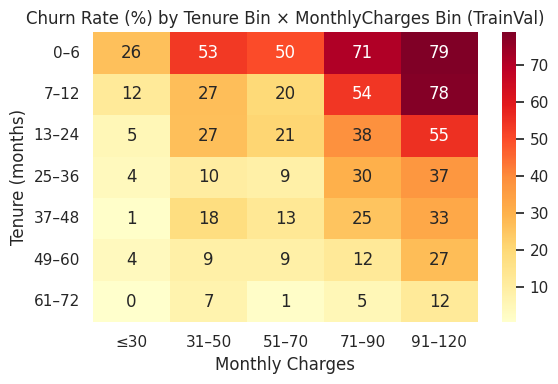

In [ ]:
# Tenure × MonthlyCharges interaction (binned churn heatmap)
tenure_bins = pd.cut(trainval_df["tenure"], bins=[-1, 6, 12, 24, 36, 48, 60, 72], labels=["0–6","7–12","13–24","25–36","37–48","49–60","61–72"])
charge_bins = pd.cut(trainval_df["MonthlyCharges"], bins=[0, 30, 50, 70, 90, 120], labels=["≤30","31–50","51–70","71–90","91–120"])
pivot = pd.pivot_table(trainval_df.assign(TBin=tenure_bins, CBin=charge_bins),
                       values="ChurnFlag", index="TBin", columns="CBin", aggfunc="mean")
plt.figure(figsize=(6,4))
sns.heatmap(pivot*100, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Churn Rate (%) by Tenure Bin × MonthlyCharges Bin (TrainVal)")
plt.ylabel("Tenure (months)"); plt.xlabel("Monthly Charges"); plt.tight_layout(); plt.show()

Heatmap analysis reveals that churn is most severe (70–77%) among customers with less than one year tenure and high monthly charges (> 70), whereas long tenure customers show consistently low churn across all charge levels.


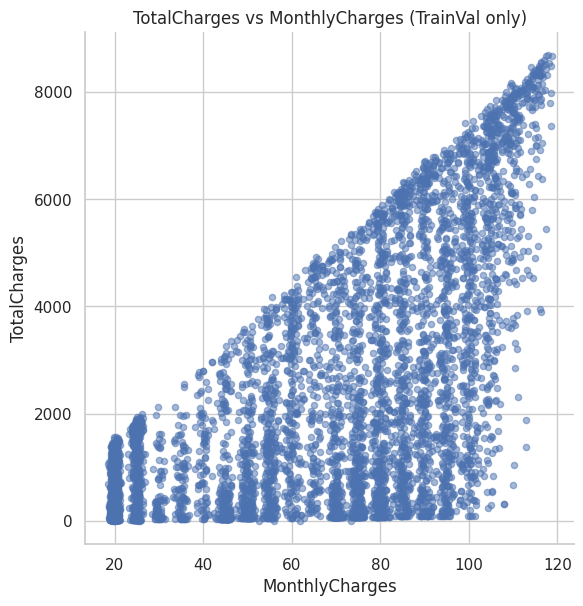

In [ ]:
sns.set_style("whitegrid")
g = sns.lmplot(
    data=trainval_df, x="MonthlyCharges", y="TotalCharges",
    fit_reg=False, height=6, scatter_kws={"alpha":0.5, "s":20}
)
g.set_axis_labels("MonthlyCharges", "TotalCharges")
plt.title("TotalCharges vs MonthlyCharges (TrainVal only)")
plt.show()

The plot shows a clear upward trend, where higher monthly charges generally lead to higher total charges. The vertical spread comes from differences in tenure, since customers with longer tenure accumulate more total charges.

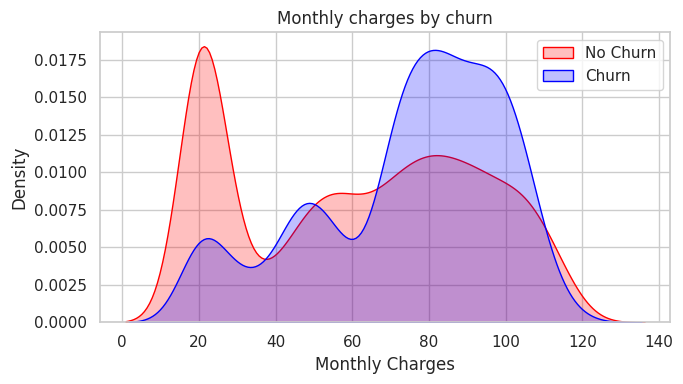

In [ ]:
# KDE plot to compare MonthlyCharges distribution for churned vs non churned customers

plt.figure(figsize=(7,4))
sns.kdeplot(
    trainval_df.loc[trainval_df["Churn"]=="No","MonthlyCharges"],
    color="Red", shade=True, label="No Churn"
)
sns.kdeplot(
    trainval_df.loc[trainval_df["Churn"]=="Yes","MonthlyCharges"],
    color="Blue", shade=True, label="Churn"
)
plt.title("Monthly charges by churn")
plt.xlabel("Monthly Charges"); plt.ylabel("Density")
plt.legend(loc="upper right")
plt.tight_layout(); plt.show()

From this also it can be got the insight that Churn is high when Monthly Charges ar high.

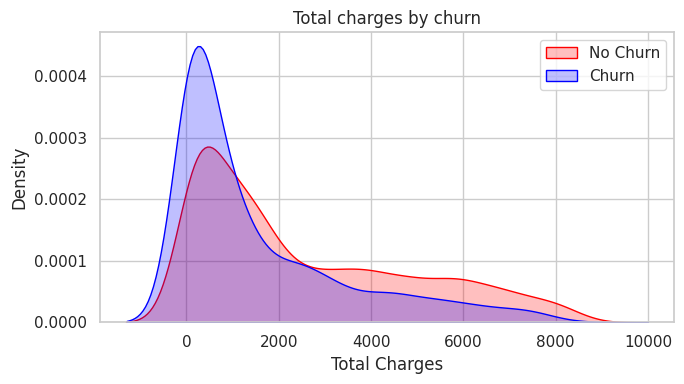

In [ ]:
# KDE plot to compare TotalCharges distribution for churned vs non churned customers

plt.figure(figsize=(7,4))
sns.kdeplot(
    trainval_df.loc[trainval_df["Churn"]=="No","TotalCharges"],
    color="Red", shade=True, label="No Churn"
)
sns.kdeplot(
    trainval_df.loc[trainval_df["Churn"]=="Yes","TotalCharges"],
    color="Blue", shade=True, label="Churn"
)
plt.title("Total charges by churn")
plt.xlabel("Total Charges"); plt.ylabel("Density")
plt.legend(loc="upper right")
plt.tight_layout(); plt.show()

Churn is more common among customers with lower total charges, which happens because they leave early. When we combine tenure, monthly charges, and total charges, the picture becomes clearer, high monthly charges at short tenure lead to low total charges, and this combination is strongly linked to high churn.

## Data Preprocessing

In [ ]:
# OneHotEncoder
try:
    ohe = OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", ohe, cat_cols),
    ]
)

In [ ]:
# Fit the preprocessor on TrainVal and transform
X_trainval_enc = preprocessor.fit_transform(X_trainval)

cat_names = preprocessor.named_transformers_["cat"].get_feature_names_out(cat_cols)
all_feature_names = num_cols + list(cat_names)

X_trainval_df = pd.DataFrame(X_trainval_enc, columns=all_feature_names, index=X_trainval.index)

print("Encoded shape:", X_trainval_df.shape)
X_trainval_df.head(10)

Encoded shape: (5986, 25)


tenure  MonthlyCharges  TotalCharges  gender_Male  Partner_Yes  \
3080     2.0           24.30         38.45          1.0          0.0   
1203    60.0           25.00       1505.05          0.0          0.0   
3292     5.0           50.95        229.40          0.0          0.0   
97       5.0           21.05        113.85          1.0          0.0   
1402    18.0           35.00        553.00          0.0          0.0   
968     71.0           77.35       5550.10          0.0          0.0   
5815     9.0           85.05        746.50          1.0          0.0   
3281    49.0           94.80       4690.65          1.0          1.0   
3868    21.0           74.05       1565.70          0.0          1.0   
3124    68.0           82.85       5776.45          1.0          1.0   

      Dependents_Yes  PhoneService_Yes  MultipleLines_Yes  \
3080             0.0               0.0                0.0   
1203             0.0               1.0                1.0   
3292             0.0               0.0                0.0   
97               0.0               1.0                0.0   
1402             1.0               0.0                0.0   
968              0.0               1.0                0.0   
5815             0.0               1.0                1.0   
3281             0.0               1.0                0.0   
3868             1.0               1.0                0.0   
3124             1.0               1.0                0.0   

      InternetService_DSL  InternetService_Fiber optic  ...  StreamingTV_Yes  \
3080                  1.0                          0.0  ...              0.0   
1203                  0.0                          0.0  ...              0.0   
3292                  1.0                          0.0  ...              1.0   
97                    0.0                          0.0  ...              0.0   
1402                  1.0                          0.0  ...              0.0   
968                   1.0                          0.0  ...              1.0   
5815                  0.0                          1.0  ...              0.0   
3281                  0.0                          1.0  ...              1.0   
3868                  0.0                          1.0  ...              0.0   
3124                  1.0                          0.0  ...              1.0   

      StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
3080                  0.0                      1.0                0.0   
1203                  0.0                      0.0                0.0   
3292                  1.0                      1.0                0.0   
97                    0.0                      1.0                0.0   
1402                  1.0                      1.0                0.0   
968                   0.0                      0.0                0.0   
5815                  1.0                      1.0                0.0   
3281                  1.0                      0.0                0.0   
3868                  0.0                      1.0                0.0   
3124                  1.0                      0.0                0.0   

      Contract_Two year  PaperlessBilling_Yes  \
3080                0.0                   0.0   
1203                1.0                   0.0   
3292                0.0                   1.0   
97                  0.0                   0.0   
1402                0.0                   1.0   
968                 1.0                   0.0   
5815                0.0                   1.0   
3281                1.0                   1.0   
3868                0.0                   1.0   
3124                1.0                   0.0   

      PaymentMethod_Bank transfer (automatic)  \
3080                                      0.0   
1203                                      0.0   
3292                                      0.0   
97                                        0.0   
1402                                      0.0   
968                   

## Model Implementation

In [ ]:
# Define 5 fold stratified cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Pipeline: Preprocessing + SMOTE oversampling + Decision Tree
pipe_smote_dt = Pipeline([
    ("pre", preprocessor),
    ("smote", SMOTE(k_neighbors=5, random_state=42)),
    ("clf", DecisionTreeClassifier(random_state=42))
])

In [ ]:
# Pipeline: Preprocessing + SMOTE oversampling + Random Forest
pipe_smote_rf = Pipeline([
    ("pre", preprocessor),
    ("smote", SMOTE(k_neighbors=5, random_state=42)),
    ("clf", RandomForestClassifier(random_state=42, n_jobs=-1))
])

In [ ]:
# Pipeline: Preprocessing + Decision Tree with class weights (no SMOTE)
pipe_weighted_dt = Pipeline([
    ("pre", preprocessor),
    ("clf", DecisionTreeClassifier(class_weight="balanced", random_state=42))
])

# Pipeline: Preprocessing + Random Forest with class weights (no SMOTE)
pipe_weighted_rf = Pipeline([
    ("pre", preprocessor),
    ("clf", RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1))
])

In [ ]:
# Define custom precision and recall scorers for churn class (label=1)
def precision_pos(y_true, y_pred):
    return precision_recall_fscore_support(y_true, y_pred, average=None, labels=[0,1])[0][1]

def recall_pos(y_true, y_pred):
    return precision_recall_fscore_support(y_true, y_pred, average=None, labels=[0,1])[1][1]

# Dictionary of evaluation metrics to track during cross validation
scorers = {
    "roc_auc": "roc_auc",
    "f1_pos": make_scorer(f1_score, pos_label=1),
    "precision_pos": make_scorer(precision_pos),
    "recall_pos": make_scorer(recall_pos),
    "accuracy": "accuracy",
}

In [ ]:
# Evaluate all baseline models (SMOTE + class-weighted DT/RF) using cross validation
models = {
    "SMOTE+DT": pipe_smote_dt,
    "SMOTE+RF": pipe_smote_rf,
    "Weighted DT": pipe_weighted_dt,
    "Weighted RF": pipe_weighted_rf,
}

rows = []
for name, m in models.items():
    cvres = cross_validate(m, X_trainval, y_trainval, cv=cv, scoring=scorers, n_jobs=-1, return_train_score=False)
    rows.append({
        "model": name,
        **{k+"_mean": cvres[f"test_{k}"].mean() for k in scorers.keys()},
        **{k+"_std":  cvres[f"test_{k}"].std()  for k in scorers.keys()},
    })

baseline_summary = pd.DataFrame(rows).sort_values("f1_pos_mean", ascending=False)
display(baseline_summary.round(3))

model  roc_auc_mean  f1_pos_mean  precision_pos_mean  \
1     SMOTE+RF         0.823        0.553               0.611   
3  Weighted RF         0.826        0.548               0.632   
2  Weighted DT         0.666        0.509               0.508   
0     SMOTE+DT         0.660        0.499               0.483   

   recall_pos_mean  accuracy_mean  roc_auc_std  f1_pos_std  precision_pos_std  \
1            0.505          0.783        0.009       0.018              0.027   
3            0.483          0.788        0.009       0.014              0.022   
2            0.510          0.739        0.013       0.019              0.017   
0            0.518          0.725        0.015       0.022              0.019   

   recall_pos_std  accuracy_std  
1           0.017         0.010  
3           0.013         0.008  
2           0.025         0.010  
0           0.032         0.011



*   The Random Forest models clearly outperform Decision Trees, with SMOTE+RF achieving the best F1 score (0.553) and balanced performance across metrics.
*   Weighted RF also performs well, slightly trading recall for higher precision, while both Decision Tree variants lag behind in overall predictive power.




In [ ]:
# Hyperparameter tuning for Random Forest and Decision Tree models

# Random Forest (SMOTE) randomized search
# Pipeline
rf_smote = Pipeline([("pre", preprocessor),
                     ("smote", SMOTE(k_neighbors=5, random_state=42)),
                     ("clf", RandomForestClassifier(random_state=42, n_jobs=-1))])

# Search space for Random Forest with SMOTE
rf_smote_dist = {
    "clf__n_estimators": [250, 350, 450, 600],
    "clf__max_depth": [None, 10, 14, 18, 22],
    "clf__min_samples_split": [2, 5, 8, 12],
    "clf__min_samples_leaf": [1, 2, 4, 6],
    "clf__max_features": ["sqrt", "log2", None],
}

# Randomized search (30 combinations) using F1 score on churn class
rf_smote_search = RandomizedSearchCV(
    rf_smote, rf_smote_dist, n_iter=30, scoring=make_scorer(f1_score, pos_label=1),
    cv=cv, random_state=42, n_jobs=-1, verbose=0
).fit(X_trainval, y_trainval)
print("Best SMOTE+RF params:", rf_smote_search.best_params_, " | Best F1_pos:", rf_smote_search.best_score_)


# Random Forest (Weighted) randomized search
# Pipeline
rf_weighted = Pipeline([("pre", preprocessor),
                        ("clf", RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1))])

# Search space for class-weighted Random Forest
rf_weighted_dist = {
    "clf__n_estimators": [250, 350, 450, 600],
    "clf__max_depth": [None, 10, 14, 18, 22],
    "clf__min_samples_split": [2, 5, 8, 12],
    "clf__min_samples_leaf": [1, 2, 4, 6],
    "clf__max_features": ["sqrt", "log2", None],
}

# Randomized search (30 combinations) for weighted RF
rf_weighted_search = RandomizedSearchCV(
    rf_weighted, rf_weighted_dist, n_iter=30, scoring=make_scorer(f1_score, pos_label=1),
    cv=cv, random_state=42, n_jobs=-1, verbose=0
).fit(X_trainval, y_trainval)
print("Best Weighted RF params:", rf_weighted_search.best_params_, " | Best F1_pos:", rf_weighted_search.best_score_)


# Decision Tree (SMOTE) grid search
# Pipeline
dt_smote = Pipeline([("pre", preprocessor),
                     ("smote", SMOTE(k_neighbors=5, random_state=42)),
                     ("clf", DecisionTreeClassifier(random_state=42))])

# Grid search space for Decision Tree
dt_grid = {
    "clf__max_depth": [None, 6, 8, 10, 12],
    "clf__min_samples_leaf": [1, 3, 5, 10],
    "clf__min_samples_split": [2, 5, 10]
}

# Exhaustive grid search for Decision Tree with SMOTE
dt_smote_grid = GridSearchCV(
    dt_smote, dt_grid, scoring=make_scorer(f1_score, pos_label=1), cv=cv,
    n_jobs=-1, verbose=0
).fit(X_trainval, y_trainval)

print("Best SMOTE+DT params:", dt_smote_grid.best_params_, " | Best F1_pos:", dt_smote_grid.best_score_)


Best SMOTE+RF params: {'clf__n_estimators': 450, 'clf__min_samples_split': 8, 'clf__min_samples_leaf': 2, 'clf__max_features': 'sqrt', 'clf__max_depth': 10}  | Best F1_pos: 0.619811187618631
Best Weighted RF params: {'clf__n_estimators': 600, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 4, 'clf__max_features': 'sqrt', 'clf__max_depth': 10}  | Best F1_pos: 0.6348591975734049
Best SMOTE+DT params: {'clf__max_depth': 6, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 2}  | Best F1_pos: 0.606717171613275


Weighted Random Forest (n_estimators=600, max_depth=10, sqrt features) achieved the best cross-validated F1 for churn (~0.635).

## Model Evaluation & Discussion

Selected: Weighted RF | CV F1_pos=0.6349
Chosen threshold from OOF: 0.475 (P=0.546, R=0.766, F1=0.637)


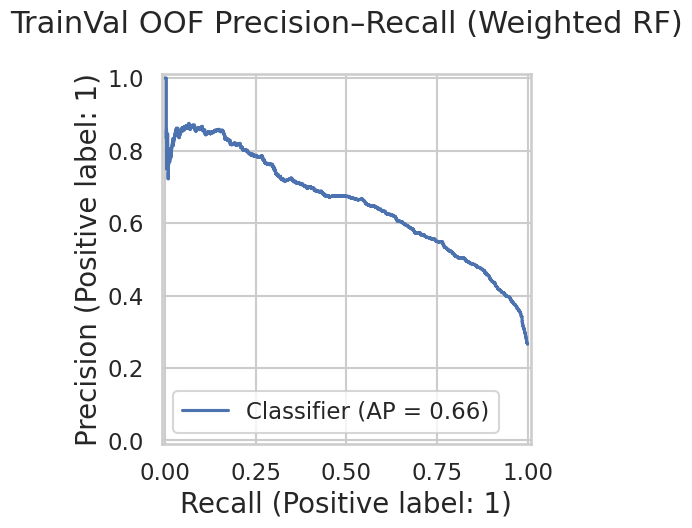

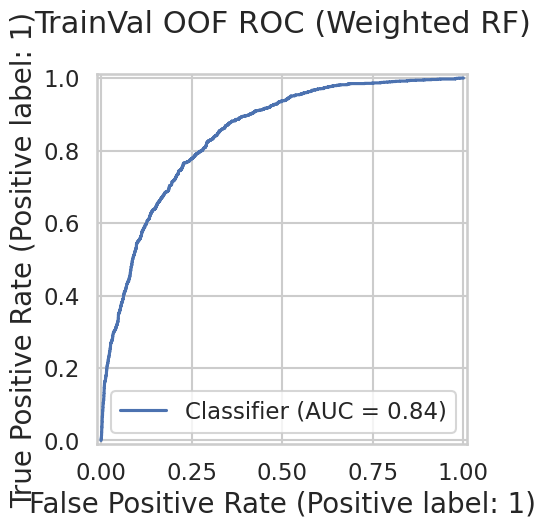

In [ ]:
# Select best tuned model by CV F1
candidates = [
    ("SMOTE+RF", rf_smote_search.best_estimator_, rf_smote_search.best_score_),
    ("Weighted RF", rf_weighted_search.best_estimator_, rf_weighted_search.best_score_),
    ("SMOTE+DT", dt_smote_grid.best_estimator_, dt_smote_grid.best_score_),
]
best_name, best_pipeline, best_cv_f1 = sorted(candidates, key=lambda x: x[2], reverse=True)[0]
print(f"Selected: {best_name} | CV F1_pos={best_cv_f1:.4f}")

# Get OOF probabilities on TrainVal
oof_proba = cross_val_predict(
    best_pipeline, X_trainval, y_trainval, cv=cv,
    method="predict_proba", n_jobs=-1
)[:, 1]

# Sweep thresholds on OOF(out of fold) to maximize F1 for churn (class=1)
ths = np.linspace(0.2, 0.8, 25)
scores = []
for t in ths:
    pred = (oof_proba >= t).astype(int)
    pr, rc, f1, _ = precision_recall_fscore_support(y_trainval, pred, average=None, labels=[0,1])
    scores.append((t, pr[1], rc[1], f1[1]))

best_t, p_best, r_best, f1_best = max(scores, key=lambda x: x[3])
print(f"Chosen threshold from OOF: {best_t:.3f} (P={p_best:.3f}, R={r_best:.3f}, F1={f1_best:.3f})")

# Visualize OOF PR and ROC for the selected model
PrecisionRecallDisplay.from_predictions(y_trainval, oof_proba)
plt.title(f"TrainVal OOF Precision–Recall ({best_name})"); plt.show()

RocCurveDisplay.from_predictions(y_trainval, oof_proba)
plt.title(f"TrainVal OOF ROC ({best_name})"); plt.show()




*   The OOF Precision Recall curve shows average precision ≈ 0.66, which is strong given the class imbalance (baseline AP would be roughly the churn rate ~0.27).
*   The OOF ROC AUC is ≈ 0.84, indicating the model ranks churners well and separates the classes effectively.



Test Classification Report (threshold tuned via OOF):
              precision    recall  f1-score   support

          No       0.91      0.75      0.82       777
         Yes       0.54      0.80      0.64       280

    accuracy                           0.76      1057
   macro avg       0.72      0.78      0.73      1057
weighted avg       0.81      0.76      0.78      1057



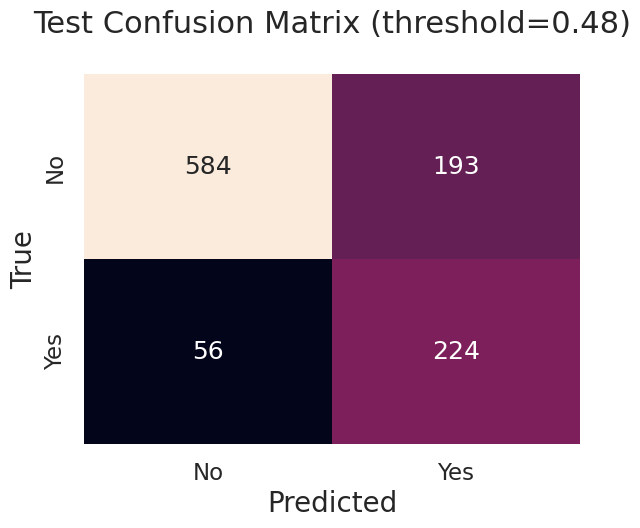

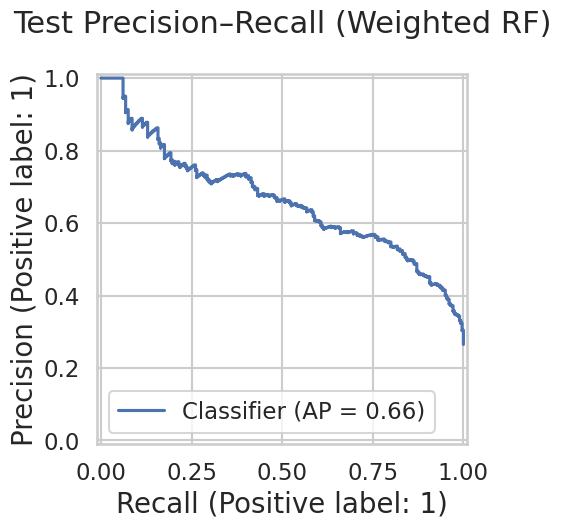

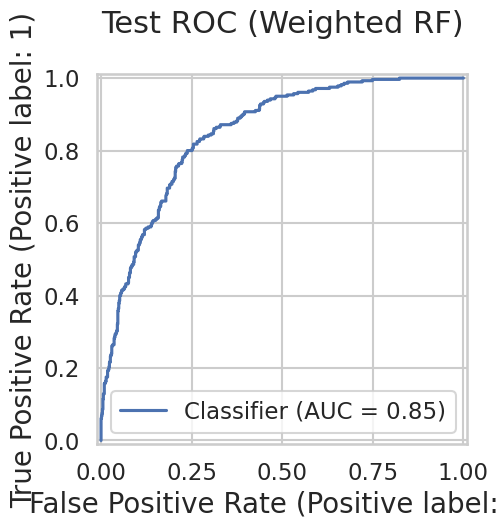

Test AP: 0.664 | Test AUROC: 0.849 | Test Accuracy: 0.764


In [ ]:
# Final model evaluation

# Lock the model on all TrainVal
best_pipeline.fit(X_trainval, y_trainval)

# Evaluate on Test
test_proba = best_pipeline.predict_proba(X_test)[:, 1]
test_pred  = (test_proba >= best_t).astype(int)

print("Test Classification Report (threshold tuned via OOF):")
print(classification_report(y_test, test_pred, target_names=["No","Yes"]))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, test_pred)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, xticklabels=["No","Yes"], yticklabels=["No","Yes"])
plt.title(f"Test Confusion Matrix (threshold={best_t:.2f})"); plt.xlabel("Predicted"); plt.ylabel("True"); plt.show()

# Precision Recall and ROC curves
PrecisionRecallDisplay.from_predictions(y_test, test_proba)
plt.title(f"Test Precision–Recall ({best_name})"); plt.show()
RocCurveDisplay.from_predictions(y_test, test_proba)
plt.title(f"Test ROC ({best_name})"); plt.show()

# Scalar metrics
ap_test  = average_precision_score(y_test, test_proba)
auc_test = roc_auc_score(y_test, test_proba)
acc_test = accuracy_score(y_test, test_pred)
print(f"Test AP: {ap_test:.3f} | Test AUROC: {auc_test:.3f} | Test Accuracy: {acc_test:.3f}")


Top 20 features:


importance
Contract_Month-to-month           0.156045
tenure                            0.146016
TotalCharges                      0.120726
MonthlyCharges                    0.109295
Contract_Two year                 0.085944
InternetService_Fiber optic       0.074411
PaymentMethod_Electronic check    0.051881
InternetService_No                0.031816
Contract_One year                 0.029767
PaperlessBilling_Yes              0.021943
OnlineSecurity_Yes                0.018845
TechSupport_Yes                   0.018462
InternetService_DSL               0.016056
StreamingMovies_Yes               0.013362
gender_Male                       0.012541
OnlineBackup_Yes                  0.011855
Partner_Yes                       0.011420
Dependents_Yes                    0.011204
StreamingTV_Yes                   0.010842
MultipleLines_Yes                 0.010510

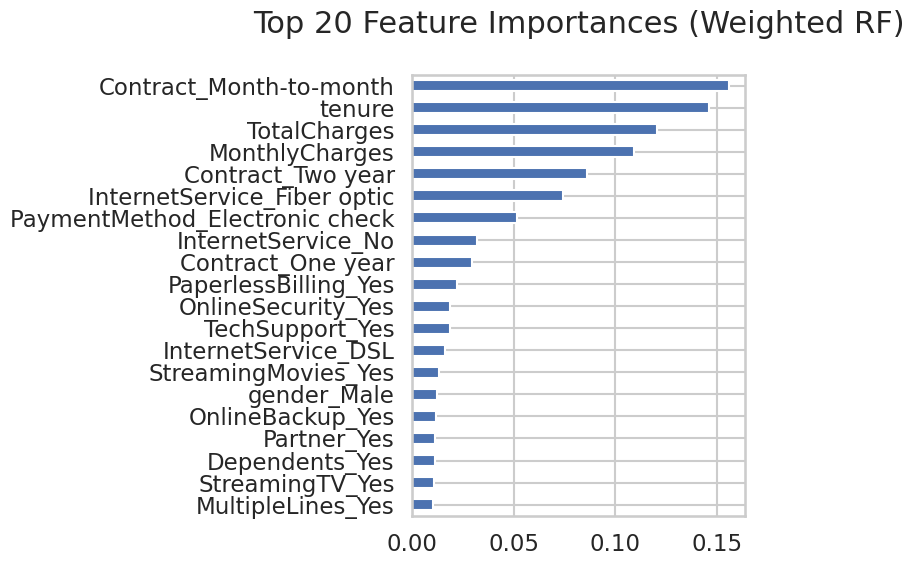

In [ ]:
# Extract feature importances
clf = best_pipeline.named_steps["clf"]

if hasattr(clf, "feature_importances_"):
    pre = best_pipeline.named_steps["pre"]
    cat_names = pre.named_transformers_["cat"].get_feature_names_out(cat_cols)
    feature_names = num_cols + list(cat_names)

    importances = pd.Series(clf.feature_importances_, index=feature_names).sort_values(ascending=False)
    top20 = importances.head(20)
    print("Top 20 features:")
    display(top20.to_frame("importance"))

    plt.figure(figsize=(8,6))
    top20.sort_values().plot(kind="barh")
    plt.title(f"Top 20 Feature Importances ({best_name})")
    plt.tight_layout(); plt.show()
else:
    print("Chosen classifier has no feature_importances_ (e.g., non-tree model).")


In [ ]:
# Save full pipeline & threshold
joblib.dump(best_pipeline, "churn_best_pipeline.joblib")
with open("churn_threshold.txt","w") as f:
    f.write(str(float(best_t)))
print("Saved: churn_best_pipeline.joblib, churn_threshold.txt")

# Single row prediction helper
def predict_churn_probability(pipeline, row_df: pd.DataFrame) -> float:
    """Return churn probability for a single-row DataFrame with original columns."""
    return float(pipeline.predict_proba(row_df)[:,1][0])

Saved: churn_best_pipeline.joblib, churn_threshold.txt


## Discussion

The comparative evaluation shows that ensemble models generalize better than single trees for this dataset. Both Random Forest variants outperformed Decision Trees, with the class weighted Random Forest emerging as best after tuning (CV F1 for churn ≈ 0.635), slightly ahead of SMOTE+RF. This suggests that class weighting handled imbalance more effectively than synthetic oversampling in our feature space, while regularized settings (max_depth=10, min_samples_* > 1, many trees) controlled overfitting.

On the held out test set, using the OOF tuned threshold (~0.48), the selected model achieved recall = 0.80 and precision = 0.54 for churn (F1 ≈ 0.64), with overall AUROC ≈ 0.85, AP ≈ 0.66, and accuracy ≈ 0.76. The confusion matrix (TN=584, FP=193, FN=56, TP=224) indicates a recall first operating point, the model correctly identifies most churners while accepting some false alarms, an appropriate trade off when the business objective prioritizes catching at risk customers for retention outreach. Importantly, test performance aligns with cross validated results, indicating good generalization.

These outcomes align with our EDA, short tenure and higher monthly charges are strong risk signals, and billing/contract factors drive separation; the model’s gains come from capturing these interactions while staying calibrated to class imbalance. In practice, the decision threshold can be shifted to reflect costs (for example, raise it to reduce outreach volume and false positives, or lower it to capture even more churners). Future refinements could include probability calibration, cost sensitive tuning, and adding temporal or service usage features to further improve precision at the desired recall level.


# Conclusion
This project built and compared imbalance aware Decision Tree and Random Forest pipelines for telecom churn prediction. After cross validated model selection and hyperparameter tuning, the class weighted Random Forest emerged as best (CV F1 on churn ≈ 0.635). Using an OOF optimized threshold (~0.48), the final model generalized well on the held out test set, achieving recall ≈ 0.80 and precision ≈ 0.54 for churn (F1 ≈ 0.64), with AUROC ≈ 0.85, AP ≈ 0.66, and accuracy ≈ 0.76.

Findings are consistent with the exploratory analysis, shorter tenure and higher monthly charges are key risk signals, and contract/billing factors drive separation; customers who leave early naturally have lower total charges. The chosen recall oriented operating point is appropriate for proactive retention, accepting some false positives to capture most at risk customers. Thresholds can be adjusted to match business costs (for example, increasing the threshold to reduce outreach volume or lowering it to catch more churners).

Overall, the tuned Random Forest provides reliable predictive performance and actionable insight for targeted interventions.

## References

[1] Chang, V., Hall, K., Xu, Q. A., Amao, F. O., Ganatra, M. A., & Benson, V. (2024). Prediction of Customer Churn Behavior in the Telecommunication Industry Using Machine Learning Models. *Algorithms, 17*(6), 231.  

[2] Taskin, N. (2023). *Customer Churn Prediction Model in Telecommunication Sector Using Machine Learning Technique* (Master's thesis, Uppsala University).  

[3] Gaur, A., & Dubey, R. (2018). Predicting customer churn prediction in telecom sector using various machine learning techniques. In *2018 International Conference on Advanced Computation and Telecommunication (ICACAT)* (pp. 1–5). IEEE.  

[4] Wagh, S. K., Andhaleb, A. A., Wagh, K. S., Pansare, J. R., Ambadekar, S. P., & Gawande, S. H. (2024). Customer churn prediction in telecom sector using machine learning techniques. *Results in Control and Optimization, 14*, 100342.  

[5] Kavitha, V., Kumar, G. H., Kumar, S. V. M., & Harish, M. (2020). Churn Prediction of Customer in Telecom Industry using Machine Learning Algorithms. *International Journal of Engineering Research & Technology, 9*(05).  
